In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

ride_df = city_data.merge(ride_data, how='left', on='city')
city_df = ride_df.drop_duplicates(subset='city',keep='first')[['city', 'driver_count', 'type']].set_index('city')
# Display the data table for preview

ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

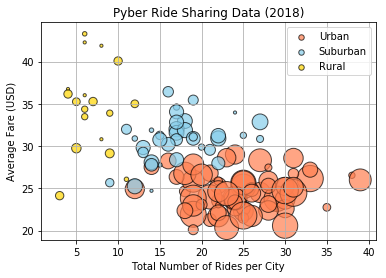

In [2]:
# Obtain the x and y coordinates for each of the three city types

u_set = ride_df.loc[ride_df['type'] == 'Urban'].groupby('city')
u_siz = city_df.loc[city_df['type'] == 'Urban'].sort_index()
s_set = ride_df.loc[ride_df['type'] == 'Suburban'].groupby('city')
s_siz = city_df.loc[city_df['type'] == 'Suburban'].sort_index()
r_set = ride_df.loc[ride_df['type'] == 'Rural'].groupby('city')
r_siz = city_df.loc[city_df['type'] == 'Rural'].sort_index()


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(u_set['fare'].count(), u_set['fare'].mean(), s=u_siz['driver_count']*10, c='coral', edgecolor='k', marker="o", alpha=0.7, label='Urban')
ax1.scatter(s_set['fare'].count(), s_set['fare'].mean(), s=s_siz['driver_count']*10, c='skyblue', edgecolor='k', marker="o", alpha=0.7, label='Suburban')
ax1.scatter(r_set['fare'].count(), r_set['fare'].mean(), s=r_siz['driver_count']*10, c='gold', edgecolor='k', marker="o", alpha=0.7, label='Rural')

lgnd = ax1.legend(loc='upper right', markerscale=.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

ax1.grid(True)

plt.ylabel('Average Fare (USD)')
plt.xlabel('Total Number of Rides per City')
ax1.set_title('Pyber Ride Sharing Data (2018)')

plt.show()

## Total Fares by City Type

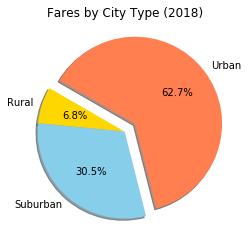

In [3]:
# Calculate Type Percents
fxtype = ride_df.groupby('type')['fare'].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'Skyblue', 'Coral']
explode= [0, 0, 0.15]
# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(fxtype, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.set_title("Fares by City Type (2018)")
# Save Figure
plt.show()

## Total Rides by City Type

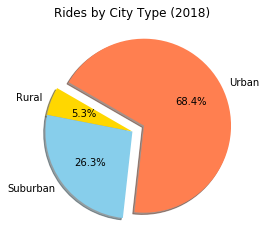

In [4]:
# Calculate Ride Percents
rxtype = ride_df.groupby('type')['fare'].count()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'Skyblue', 'Coral']
explode= [0, 0, 0.15]
# Build Pie Chart

fig1, ax1 = plt.subplots()
ax1.pie(rxtype, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.set_title("Rides by City Type (2018)")
# Save Figure
plt.show()

## Total Drivers by City Type

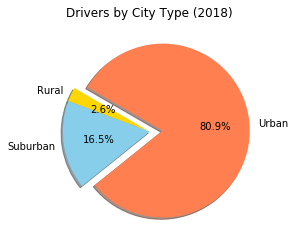

In [5]:
# Calculate Driver Percents
dxtype = city_df.groupby('type')['driver_count'].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'Skyblue', 'Coral']
explode= [0, 0, 0.15]
# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(dxtype, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.set_title("Drivers by City Type (2018)")
# Save Figure
plt.show()